<a href="https://colab.research.google.com/github/V-Vibee/YBI-Internship/blob/main/Daibetes_Prediction__Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Objective: To Predict whether customers are having Diabetes or not**

***Import the required libraries***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***Import Dataset***

In [2]:
df= pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Diabetes.csv')
df.head()

pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1

***Exploratory Data Analysis***

In [ ]:
! pip install ydata-profiling

In [6]:
from ydata_profiling import ProfileReport

In [7]:
profile= ProfileReport(df, title= 'Diabetes profile report')

In [8]:
profile.to_widgets()

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:524: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
profile.to_notebook_iframe()

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
df.describe()

pregnancies     glucose   diastolic     triceps     insulin  \
count   768.000000  768.000000  768.000000  768.000000  768.000000   
mean      3.845052  120.894531   69.105469   20.536458   79.799479   
std       3.369578   31.972618   19.355807   15.952218  115.244002   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       1.000000   99.000000   62.000000    0.000000    0.000000   
50%       3.000000  117.000000   72.000000   23.000000   30.500000   
75%       6.000000  140.250000   80.000000   32.000000  127.250000   
max      17.000000  199.000000  122.000000   99.000000  846.000000   

              bmi         dpf         age    diabetes  
count  768.000000  768.000000  768.000000  768.000000  
mean    31.992578    0.471876   33.240885    0.348958  
std      7.884160    0.331329   11.760232    0.476951  
min      0.000000    0.078000   21.000000    0.000000  
25%     27.300000    0.243750   24.000000    0.000000  
50%     32.000000    0.372500   29.000000    0.000000  
75%     36.600000    0.626250   41.000000    1.000000  
max     67.100000    2.420000   81.000000    1.000000

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
df.shape

(768, 9)

In [13]:
df.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

#***Using Logistic Regression***

**Define y and X**

In [15]:
y= df['diabetes']
X= df[['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age']]

***Train test split***

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=2529)

***Model Selection***

In [18]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

***Training the model***

In [19]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

***Predicting the model***

In [20]:
y_pred= model.predict(X_test)

***Evaluating the Model***

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
confusion_matrix(y_test, y_pred)

array([[108,  10],
       [ 33,  41]])

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.92      0.83       118
           1       0.80      0.55      0.66        74

    accuracy                           0.78       192
   macro avg       0.78      0.73      0.74       192
weighted avg       0.78      0.78      0.77       192



Note: The prediction accuracy here is 78 % and the model has precisely predicted almost 80 % of people having diabetes

#***Using Decision Tree***

In [24]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
model= DecisionTreeClassifier(max_depth=3)

***Train the model***

In [25]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

***Prediction of Model***

In [26]:
y_pred= model.predict(X_test)

***Evaluation of Model***

In [27]:
from sklearn.metrics import classification_report

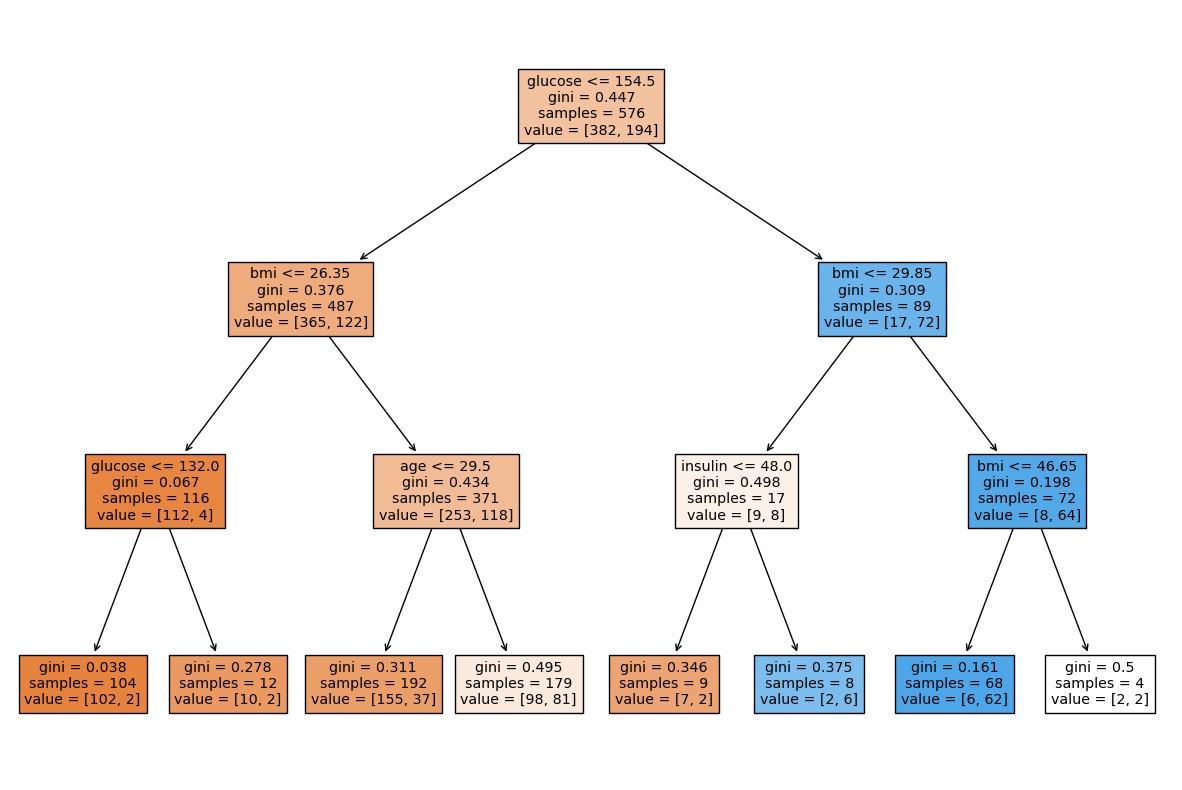

In [28]:
fig = plt.subplots(figsize=(15,10))
plot_tree(model, feature_names=X.columns,filled=True);

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.95      0.79       118
           1       0.76      0.26      0.38        74

    accuracy                           0.68       192
   macro avg       0.72      0.60      0.58       192
weighted avg       0.71      0.68      0.63       192



***Nb: Hence we can say that accuracy is low and not does not predict accurately, hence Logistic Regresssion would be much fitter***